In [1]:
import pandas as pd
import nltk
import random
import btext as bt
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as MNB
from nltk.tokenize import RegexpTokenizer
import spacy
# python -m spacy download en_core_web_sm
import en_core_web_sm
from IPython.display import clear_output

In [2]:
cdf = pd.read_csv('Datasets/tripadvisor_hotel_reviews.csv')
cdf.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
def convert_listlist_to_list(list_con) :
    return [" ".join(str(word) for word in i) for i in list_con]

# Tokenizing
Tokenization adalah proses memecah potongan teks menjadi potongan-potongan kecil.

In [4]:
def tokenize(container) :
    output = []
    append = output.append
    for idx, i in enumerate(container) :
        append([token for token in nlp(i)])
        clear_output(wait=True)
        print(str(idx+1) + '/' + str(len(container)))
    return output

In [5]:
nlp = en_core_web_sm.load()
data = tokenize(cdf['Review'])
list_tokenized = data
pd.DataFrame(list_tokenized[2][0:10], columns = ['Row 2 First 10 Token'])

20491/20491


,Row 2 First 10 Token
0,nice
1,rooms
2,not
3,4
4,*
5,experience
6,hotel
7,monaco
8,seattle
9,good


# Removing Stopword
Stopword adalah kata-kata yang mungkin penting dalam komunikasi, tetapi saat melakukan sentiment analysis stopword nilainya sangat kecil untuk mesin.\
Maka oleh karena itu kita perlu menghapus Stopword yang terdapat pada dataset ini.

In [6]:
def remove_stopword(container) :
    output = []
    append = output.append
    for idx, i in enumerate(container) :
        append([word for word in i if not word.is_stop])
        clear_output(wait=True)
        print(str(idx+1) + '/' + str(len(container)))
    return output

In [7]:
data = remove_stopword(data)
list_removed_stopword = data
pd.DataFrame(list_removed_stopword[2][0:10], columns = ['Row 2 First 10 Token'])

20491/20491


,Row 2 First 10 Token
0,nice
1,rooms
2,4
3,*
4,experience
5,hotel
6,monaco
7,seattle
8,good
9,hotel


# Normalizing
Normalisasi adalah pemadatan semua bentuk kata menjadi satu representasi dari sebuah kata.\
Misalnya “watched,” “watching,” and “watches” semuanya dapat dinormalisasi menjadi "watch".\

Normalisasi data ini menggunakan 3 metode utama yaitu :
- Stemming

Dengan stemming, sebuah kata dipotong pada akarnya. Unit terkecil dari kata tersebut akan digunakan untuk membuat kata turunan. Misalnya “watched”, “watching” and “watches” semuanya dapat di-stem menjadi "watch".

- Lemming

Lemmatization ini menggunakan struktur data yang menghubungkan semua bentuk kata kembali ke bentuknya yang paling sederhana, atau lemma.
Misalnya “am”, “are” and “is” semuanya dapat di-lemming menjadi "be".

- Converting Text to Lower Case

Converting Text to Lower Case ini menggunakan fungsi sederhana untuk mengubah text menjadi huruf kecil.

In [8]:
def normalize(container) :
    output = []
    append = output.append
    for idx, i in enumerate(container) :
        append([word.lemma_.lower() for word in i])
        clear_output(wait=True)
        print(str(idx+1) + '/' + str(len(container)))
    return output

In [9]:
data = normalize(data)
list_normalized = data
pd.DataFrame(list_normalized[2][0:10], columns = ['Row 2 First 10 Token'])

20491/20491


,Row 2 First 10 Token
0,nice
1,room
2,4
3,*
4,experience
5,hotel
6,monaco
7,seattle
8,good
9,hotel


# Removing Special Case
Fungsi dibawah ini digunakan untuk menghapus special case seperti @, #, * dan yang lainya.

In [10]:
def remove_scase(container) :
    output = []
    append = output.append
    for idx, i in enumerate(container) :
        append([word for word in i if not word in bt.getall_punc_tokenized()])
        clear_output(wait=True)
        print(str(idx+1) + '/' + str(len(container)))
    return output

In [11]:
data = remove_scase(data)
list_removed_scase = data
pd.DataFrame(list_removed_scase[2][0:10], columns = ['Row 2 First 10 Token'])

20491/20491


,Row 2 First 10 Token
0,nice
1,room
2,4
3,experience
4,hotel
5,monaco
6,seattle
7,good
8,hotel
9,4


# Cleaning Preview

In [12]:
preview_df = pd.DataFrame(cdf['Review'])
preview_df['After Removed Stopword'] = convert_listlist_to_list(list_removed_stopword)
preview_df['After Normalized'] = convert_listlist_to_list(list_normalized)
preview_df['After Removed Special Case'] = convert_listlist_to_list(list_removed_scase)
cdf['Review'] = convert_listlist_to_list(list_removed_scase)
preview_df

,Review,After Removed Stopword,After Normalized,After Removed Special Case
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,ok special charge diamond member hilton decide...,ok special charge diamond member hilton decide...,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,nice rooms 4 * experience hotel monaco seattle...,nice room 4 * experience hotel monaco seattle ...,nice room 4 experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...","unique , great stay , wonderful time hotel mon...","unique , great stay , wonderful time hotel mon...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...","great stay great stay , went seahawk game awes...","great stay great stay , go seahawk game awesom...",great stay great stay go seahawk game awesome ...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...","best kept secret 3rd time staying charm , 5-st...","good keep secret 3rd time stay charm , 5-star ...",good keep secret 3rd time stay charm 5-star be...
20487,great location price view hotel great quick pl...,great location price view hotel great quick pl...,great location price view hotel great quick pl...,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...","ok looks nice modern outside , desk staff part...","ok look nice modern outside , desk staff parti...",ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept 17 2...,hotel theft ruin vacation hotel open sept 17 2...


# A Quick Rating Analysis

In [13]:
container_unique_value = np.sort(cdf['Rating'].unique())
rating_analysis = []
for i in container_unique_value:
    star = '⭐ ' + str(i)
    choosed = str(len(cdf.loc[cdf['Rating'] == i]))
    percentage = str(
        round((len(cdf.loc[cdf['Rating'] == i]) /
               len(cdf)) * 100, 2)) + '%'
    rating_analysis.append([star, choosed, percentage])

rating_analysis_df = pd.DataFrame(rating_analysis,
                                  columns=['Star', 'Choosed', 'Percentage'])
rating_analysis_df

,Star,Choosed,Percentage
0,⭐ 1,1421,6.93%
1,⭐ 2,1793,8.75%
2,⭐ 3,2184,10.66%
3,⭐ 4,6039,29.47%
4,⭐ 5,9054,44.19%


# Sentiment Analysis

- Adding Sentiment Label to Dataset

In [14]:
def get_sentiment_value(v) :
    if v == 5 :
        return 'Very Positive'
    elif v == 4 :
        return 'Positive'
    elif v == 3 :
        return 'Neutral'
    elif v == 2 :
        return 'Negative'
    elif v == 1 :
        return 'Very Negative'
    else :
        return 'nan'

In [15]:
fcdf = pd.DataFrame(cdf)
fcdf['Sentiment Description'] = cdf['Rating']
fcdf['Sentiment Description'] = fcdf['Sentiment Description'].apply(lambda x : get_sentiment_value(x))
fcdf

,Review,Rating,Sentiment Description
0,nice hotel expensive parking get good deal sta...,4,Positive
1,ok special charge diamond member hilton decide...,2,Negative
2,nice room 4 experience hotel monaco seattle go...,3,Neutral
3,unique great stay wonderful time hotel monaco ...,5,Very Positive
4,great stay great stay go seahawk game awesome ...,5,Very Positive
...,...,...,...
20486,good keep secret 3rd time stay charm 5-star be...,5,Very Positive
20487,great location price view hotel great quick pl...,4,Positive
20488,ok look nice modern outside desk staff particu...,2,Negative
20489,hotel theft ruin vacation hotel open sept 17 2...,1,Very Negative


- Making Classification Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vec = CountVectorizer()
countVector = CountVectorizer(tokenizer= token.tokenize, ngram_range=(1,1))

x = countVector.fit_transform(fcdf['Review'])
y = fcdf['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
mnb = MNB()
mnb.fit(x_train, y_train)

pred_result = mnb.predict(x_test)
pred_result[0:10]

array([4, 4, 5, 5, 4, 5, 5, 4, 5, 5], dtype=int64)

- Classification Model Evaluation

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_result))

              precision    recall  f1-score   support

           1       0.75      0.39      0.52       405
           2       0.43      0.30      0.35       536
           3       0.32      0.04      0.07       708
           4       0.42      0.51      0.46      1823
           5       0.67      0.82      0.74      2676

    accuracy                           0.56      6148
   macro avg       0.52      0.41      0.43      6148
weighted avg       0.54      0.56      0.53      6148



- Data Visualization

⭐ 5 : Very Positive


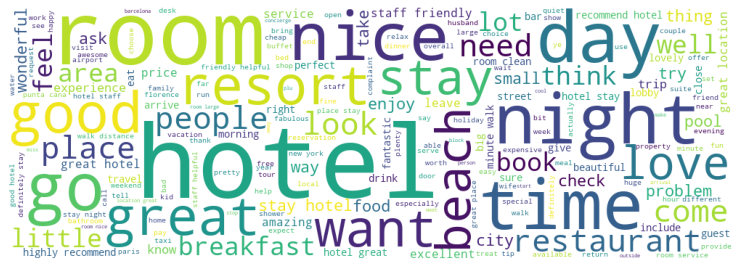

⭐ 4 : Positive


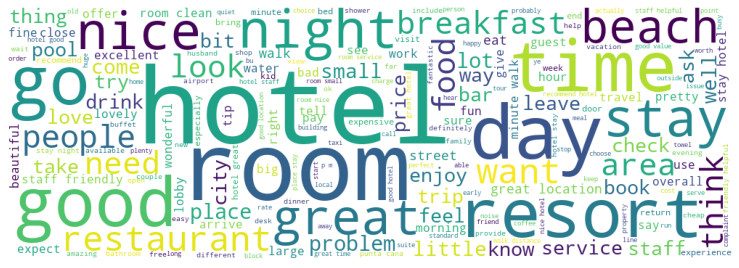

⭐ 3 : Neutral


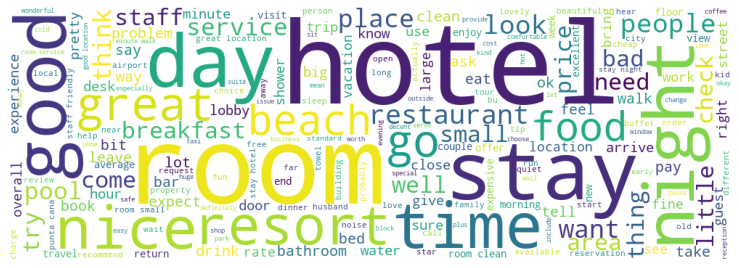

⭐ 2 : Negative


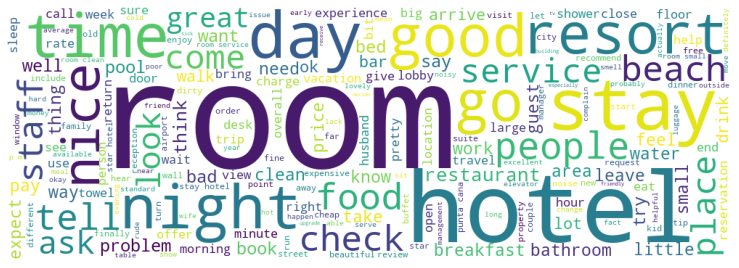

⭐ 1 : Very Negative


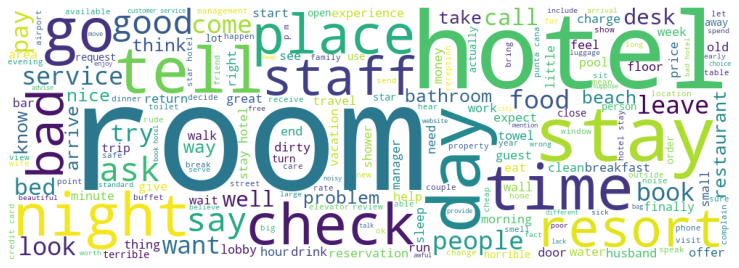

In [18]:
container_unique_value = np.sort(fcdf['Rating'].unique())[::-1]
for i in container_unique_value:
    df_pos = fcdf.loc[fcdf['Rating'] == i]
    print('⭐ ' + str(i) + ' : ' + get_sentiment_value(i))
    df_pos = df_pos['Review']
    wordcloud1 = WordCloud(background_color='white',
                          width=1000,
                          height=350
                          ).generate(" ".join(df_pos))
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud1)
    plt.axis('off')
    plt.show()

⭐ 5 : Very Positive


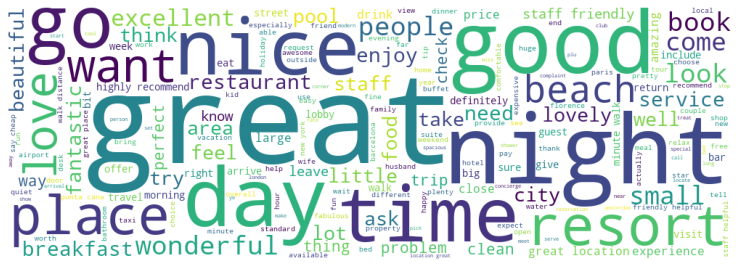

⭐ 4 : Positive


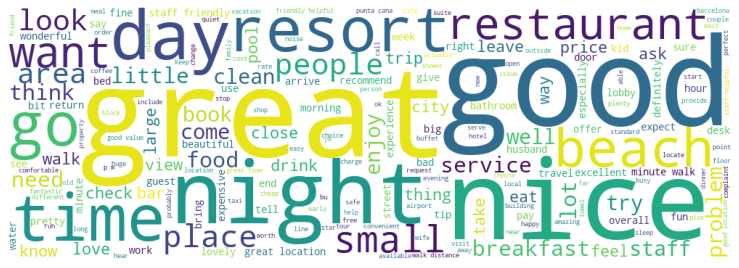

⭐ 3 : Neutral


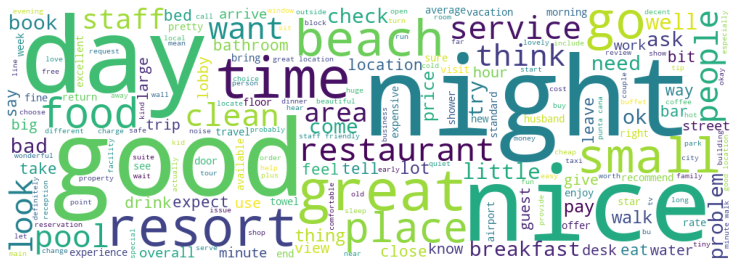

⭐ 2 : Negative


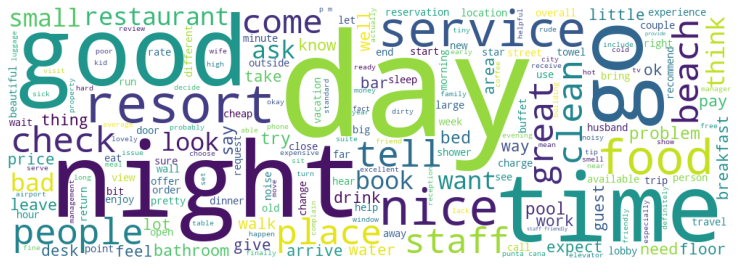

⭐ 1 : Very Negative


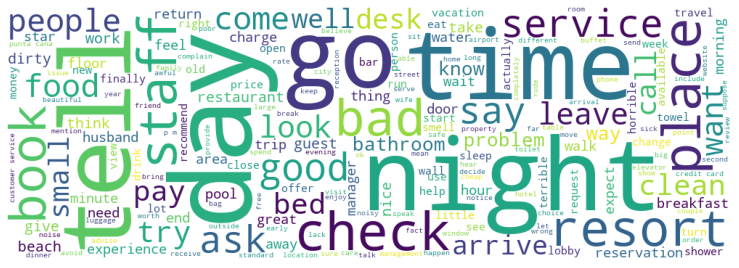

In [19]:
custome_remove_word = ['room', 'hotel', 'stay']

def remove_custome_word(val) :
    q = val.split()
    resultwords  = [word for word in q if word.lower() not in custome_remove_word]
    return ' '.join(resultwords)

fcdf['Review'] = fcdf['Review'].apply(lambda x : remove_custome_word(x))

for i in container_unique_value:
    df_pos = fcdf.loc[fcdf['Rating'] == i]
    print('⭐ ' + str(i) + ' : ' + get_sentiment_value(i))
    df_pos = df_pos['Review']
    wordcloud1 = WordCloud(background_color='white',
                          width=1000,
                          height=350
                          ).generate(" ".join(df_pos))
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud1)
    plt.axis('off')
    plt.show()